In [4]:
import numpy as np
import pandas as pd
import os

In [7]:
emicron = pd.read_csv("../../../Data/emicron_merged.csv")  # Include the subdirectory in the file path

#informality index

In [14]:
index_informality = pd.read_csv("../../../Data/emicron_index.csv")

In [15]:
index_informality = index_informality[["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P", 'II_D1', 'II_D2', 'II_D3', 'II_D4', 'II']]

In [16]:
emicron = pd.merge(emicron, index_informality, on=["DIRECTORIO", "SECUENCIA_ENCUESTA", "SECUENCIA_P"], how='left')

In [17]:
emicron_clean = emicron.copy()

#multidimensional poverty index

In [19]:
mpi = pd.read_stata("../../../Outputs/emicron-informality-mpi.dta")

In [20]:
# Assuming 'mpi' is your DataFrame
cols_with_mpi = mpi.filter(like='mpi').columns

print(cols_with_mpi)

Index(['mpi_index', 'mpi_poor', 'mpi_water', 'mpi_excrete', 'mpi_floor',
       'mpi_walls', 'mpi_overcrowding', 'mpi_housing', 'mpi_eco_dep',
       'mpi_inf_work', 'mpi_labour', 'mpi_edu_years', 'mpi_literacy',
       'mpi_education', 'mpi_edu_attend', 'mpi_child_labour', 'mpi_cy',
       'mpi_health_ss', 'mpi_deprivations'],
      dtype='object')


#geih

In [21]:
# Import geih
files = [
    "workforce_geih-2022-clean.dta",
    "other-work_geih-2022-clean.dta",
    #"other-income-taxes_geih-2022-clean.dta",
    "occupied_geih-2022-clean.dta",
    #"non-occupied_geih-2022-clean.dta",
    "migration_geih-2022-clean.dta",
    "individual_geih-2022-clean.dta"
    #"household_geih-2022-clean.dta"
]

# Dictionary to hold DataFrames
datasets_geih = {}

# Read each file into a DataFrame and store it in the dictionary
for file in files:
    # Create a valid Python identifier for each file name
    dataset_name = file.replace(" ", "_").replace("(", "").replace(")", "").replace(",", "").replace(".dta", "").replace("ó", "o")
    datasets_geih[dataset_name] = pd.read_stata("../../../Outputs/02_household-surveys/"+file)

C:\Users\angel\AppData\Local\Temp\ipykernel_6376\270101924.py:20: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  datasets_geih[dataset_name] = pd.read_stata("../../Outputs/02_household-surveys/"+file)
C:\Users\angel\AppData\Local\Temp\ipykernel_6376\270101924.py:20: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  datasets_geih[dataset_name] = pd.read_stata("../../Outputs/02_household-surveys/"+file)
C:\Users\angel\AppData\Local\Temp\ipykernel_6376\270101924.py:20: UnicodeWarning: 
One or more strings in 

In [22]:
for dataset_name, dataset in datasets_geih.items():
    print((dataset.columns[dataset.isna().any()].size)/(dataset.shape[1]))
    print(f"Head of {dataset_name}:")
    print(dataset.head(10))
    print("\n")

0.5555555555555556
Head of workforce_geih-2022-clean:
      PERIODO  DIRECTORIO  SECUENCIA_P  ORDEN  HOGAR  P6240 P6240S1  P6250  \
0  20220104.0   5000000.0          1.0    1.0    1.0    1.0            NaN   
1  20220104.0   5000000.0          1.0    2.0    1.0    4.0            2.0   
2  20220104.0   5000000.0          1.0    6.0    1.0    4.0            2.0   
3  20220104.0   5000001.0          1.0    1.0    1.0    1.0            NaN   
4  20220104.0   5000001.0          1.0    2.0    1.0    4.0            1.0   
5  20220104.0   5000001.0          1.0    3.0    1.0    4.0            1.0   
6  20220104.0   5000002.0          1.0    1.0    1.0    1.0            NaN   
7  20220104.0   5000003.0          1.0    1.0    1.0    1.0            NaN   
8  20220104.0   5000003.0          1.0    2.0    1.0    1.0            NaN   
9  20220104.0   5000004.0          1.0    1.0    1.0    4.0            2.0   

   P6260  P6260S1  ... P3362S8  P3362S7A1   FT  FFT  PET      FEX_C18     PER  \
0    N

In [23]:
for dataset_name, dataset in datasets_geih.items():
    # Find columns that have any NaN values
    nan_columns = dataset.columns[dataset.isna().any()].tolist()
    # Drop these columns from the dataframe
    datasets_geih[dataset_name] = dataset.drop(columns=nan_columns)
    # Print the names of the dropped columns
    print(f"Dropped columns from {dataset_name}: {nan_columns}")

Dropped columns from workforce_geih-2022-clean: ['P6250', 'P6260', 'P6260S1', 'P6260S2', 'P6270', 'P6280', 'P6290', 'P6300', 'P6310', 'P6320', 'P6330', 'P6340', 'P6350', 'P6351', 'P6240S2', 'P3362S1', 'P3362S2', 'P3362S3', 'P3362S4', 'P3362S5', 'P3362S6', 'P3362S7', 'P3362S8', 'FT', 'FFT']
Dropped columns from other-work_geih-2022-clean: ['P3076S1A1', 'P3076S1A2', 'P3076S2A1', 'P3076S2A2', 'P3076S3A1', 'P3076S3A2', 'P3077S1A1', 'P3077S1A2', 'P3077S2A1', 'P3077S2A2', 'P3077S3A1', 'P3077S3A2', 'P3078S1A1', 'P3078S1A2', 'P3078S2A1', 'P3078S2A2', 'P3078S3A1', 'P3078S3A2', 'P3079S1A1', 'P3079S1A2', 'P3079S2A1', 'P3079S2A2', 'P3079S3A1', 'P3079S3A2', 'P3081S1A1', 'P3081S1A2', 'P3081S2A1', 'P3081S2A2', 'P3081S3A1', 'P3081S3A2', 'P3082S1A1', 'P3082S1A2', 'P3082S2A1', 'P3082S2A2', 'P3082S3A1', 'P3082S3A2', 'P3083', 'P3083S1', 'P3085', 'P3086', 'P3087', 'P3088', 'P3089S1', 'P3089S2', 'P3091S1', 'P3091S2', 'P3092S1', 'P3092S2', 'P3093S1', 'P3093S2', 'P3094S1', 'P3094S2', 'P3094S3', 'P3095S1', 'P3

In [24]:
for dataset_name, dataset in datasets_geih.items():
    # Find columns that have any empty string values
    empty_string_columns = dataset.columns[dataset.eq("").any()].tolist()
    # Drop these columns from the dataframe
    datasets_geih[dataset_name] = dataset.drop(columns=empty_string_columns)
    # Print the names of the dropped columns
    print(f"Dropped columns from {dataset_name}: {empty_string_columns}")

Dropped columns from workforce_geih-2022-clean: ['P6240S1', 'P6260S1A1', 'P6310S1', 'AREA', 'P3362S7A1']
Dropped columns from other-work_geih-2022-clean: ['P3086S1', 'P3087S1', 'P3089S3', 'AREA']
Dropped columns from occupied_geih-2022-clean: ['P6430S1', 'P6765S1', 'P6780S1', 'P6810S1', 'P6830S1', 'P6880S1', 'P6915S1', 'P7028S1', 'P1880S1', 'AREA', 'P3051', 'P3051S1', 'P3052', 'P3052S1', 'P3054S1', 'P3055S1', 'P3057', 'P3058S1', 'P3058S2', 'P3058S3', 'P3058S4', 'P3058S5', 'P3059', 'P3062S1', 'P3062S2', 'P3062S3', 'P3062S4', 'P3062S5', 'P3062S6', 'P3062S7', 'P3062S8', 'P3062S9', 'P3063S1', 'P3064S1']
Dropped columns from migration_geih-2022-clean: ['AREA', 'P3386S1']
Dropped columns from individual_geih-2022-clean: ['P6030S1', 'P6030S3', 'P6080S1', 'P6080S1A1', 'P3147S10A1', 'AREA']


In [25]:
for dataset_name, dataset in datasets_geih.items():
    # Find rows that have any NaN values
    nan_rows = dataset[dataset.isna().any(axis=1)]

    # Drop these rows from the dataframe
    datasets_geih[dataset_name] = dataset.drop(nan_rows.index)

    # Print the number of dropped rows
    print(f"Dropped {len(nan_rows)} rows from {dataset_name}")

Dropped 0 rows from workforce_geih-2022-clean
Dropped 0 rows from other-work_geih-2022-clean
Dropped 0 rows from occupied_geih-2022-clean
Dropped 0 rows from migration_geih-2022-clean
Dropped 0 rows from individual_geih-2022-clean


In [26]:
for dataset_name, dataset in datasets_geih.items():
    print(f"The shape of {dataset_name} is {dataset.shape}")

The shape of workforce_geih-2022-clean is (713731, 15)
The shape of other-work_geih-2022-clean is (713731, 40)
The shape of occupied_geih-2022-clean is (382461, 42)
The shape of migration_geih-2022-clean is (919459, 17)
The shape of individual_geih-2022-clean is (919459, 32)


"DIRECTORIO", "SECUENCIA_P", "HOGAR", "REGIS", "ORDEN", "AREA", "CLASE", "DPTO", "FEX_C18", "PERIODO", "MES", "PER", "id_house", "adj_weight"

In [27]:
# Define the columns to check
check_cols = ["DIRECTORIO", "SECUENCIA_P", "HOGAR", "id_house", "adj_weight"]

for dataset_name, dataset in datasets_geih.items():
    # Check if any of the columns have NaN values
    nan_cols = [col for col in check_cols if dataset[col].isna().any()]

    # Print the result
    if nan_cols:
        print(f"The dataset '{dataset_name}' has NaN values in these columns: {nan_cols}")
    else:
        print(f"The dataset '{dataset_name}' does not have NaN values in any of the checked columns.")

The dataset 'workforce_geih-2022-clean' does not have NaN values in any of the checked columns.
The dataset 'other-work_geih-2022-clean' does not have NaN values in any of the checked columns.
The dataset 'occupied_geih-2022-clean' does not have NaN values in any of the checked columns.
The dataset 'migration_geih-2022-clean' does not have NaN values in any of the checked columns.
The dataset 'individual_geih-2022-clean' does not have NaN values in any of the checked columns.


In [28]:
# Define the old and new column names
rename_cols = {'MES': 'MES_REF', 'CLASE': 'CLASE_TE', 'DPTO': 'COD_DEPTO', 'ORDEN':'SECUENCIA_ENCUESTA'}

# Rename the columns in all dataframes
for dataset_name, dataset in datasets_geih.items():
    datasets_geih[dataset_name] = dataset.rename(columns=rename_cols)

In [29]:
columns_to_drop = ['PERIODO', 'PER', 'REGIS', 'CLASE_TE', 'COD_DEPTO', 'MES_REF', 'id_house', 'FEX_C18', 'HOGAR', 'adj_weight', 'P3091', 'P3089', 'P3095', 'P3096', 'P3098', 'P3099', 'P3093']

for dataset_name, dataset in datasets_geih.items():
    datasets_geih[dataset_name] = dataset.drop(columns_to_drop, axis=1, errors='ignore')

In [30]:
datasets_items = list(datasets_geih.items())

In [31]:
# Convert the data types of the merging columns to int64
for dataset_name, dataset in datasets_geih.items():
    for col in ["DIRECTORIO", "SECUENCIA_P", "SECUENCIA_ENCUESTA"]:
        datasets_geih[dataset_name][col] = datasets_geih[dataset_name][col].astype('int64')
emicron["DIRECTORIO"] = emicron["DIRECTORIO"].astype('int64')
emicron["SECUENCIA_P"] = emicron["SECUENCIA_P"].astype('int64')
emicron["SECUENCIA_ENCUESTA"] = emicron["SECUENCIA_ENCUESTA"].astype('int64')

In [32]:
#to run
# Define the columns you want to merge
merge_cols = ["DIRECTORIO", "SECUENCIA_P", 'SECUENCIA_ENCUESTA']

# Get the list of dataset items
datasets_items = list(datasets_geih.items())

emicron_merge = {}

# Merge the first dataset
emicron_merge = pd.merge(emicron, datasets_items[0][1], on=merge_cols, how='inner')

# Loop over the rest of the datasets in datasets_geih
for dataset_name, dataset in datasets_items[1:]:
  emicron_merge = pd.merge(emicron_merge, dataset, on=merge_cols, how='inner')
  print(emicron_merge)

       DIRECTORIO  SECUENCIA_P  SECUENCIA_ENCUESTA  COD_DEPTO  AREA  CLASE_TE  \
0         5000001            1                   2          8   NaN         1   
1         5000003            1                   1          8   NaN         1   
2         5000003            1                   2          8   NaN         1   
3         5000007            1                   1          8   NaN         1   
4         5000008            1                   1          8   NaN         1   
...           ...          ...                 ...        ...   ...       ...   
77601     7277027            1                   4         66  66.0         1   
77602     7277028            1                   1         66  66.0         1   
77603     7277029            1                   1         66  66.0         1   
77604     7277065            1                   1         25   NaN         2   
77605     7277068            1                   2         25   NaN         2   

       P35  P241    MES_REF

In [33]:
emicron_merge.shape

(77606, 373)

In [34]:
# Check for missing values in each column
missing_counts = emicron_merge.isnull().sum()

# Count the total number of columns with missing values
num_columns_with_missing = (missing_counts > 0).sum()

f"The number of columns with missing values in emicron_merge is: {num_columns_with_missing}"

'The number of columns with missing values in emicron_merge is: 232'

In [35]:
# Assuming df is your DataFrame
duplicates = emicron_merge.duplicated(subset=['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA'])

# If you want to see the rows that are duplicated
duplicate_rows = emicron_merge[emicron_merge.duplicated(subset=['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA'])]

duplicate_rows

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,MES_REF,P3031,...,P6090,P1906S1,P1906S2,P1906S3,P1906S4,P1906S5,P1906S6,P1906S7,P1906S8,Campesina


In [36]:
emicron_copy = emicron_merge

#check relevant columns how many missing values

Most important columns with missing values (even though we could exclude them)

P661

P1057

P2991

P2992

P2993

P3014

SECUENCIA_PH

TIPO

P3080

P3082

P3084

P2990

#create dummies 'urban' and 'informal'

In [37]:
#create dummy URBAN
emicron['urban'] = emicron['AREA'].notnull().astype(int)
emicron_merge['urban'] = emicron['AREA'].notnull().astype(int)
emicron_copy['urban'] = emicron['AREA'].notnull().astype(int)
emicron_clean['urban'] = emicron['AREA'].notnull().astype(int)

#take only relevant columns and the ones with no NaN values


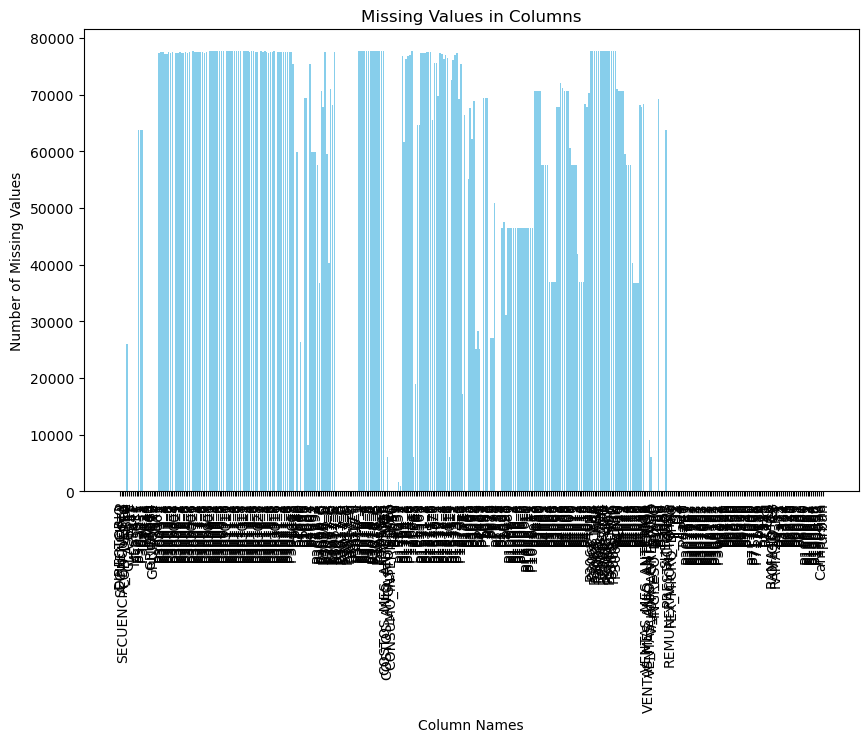

In [38]:
import matplotlib.pyplot as plt

# Assuming 'emicron' is a DataFrame
# Replace 'emicron' with your actual DataFrame name
missing_values = emicron_copy.isna().sum()

plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values, color='skyblue')
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Columns')
plt.xticks(rotation=90)
plt.show()


In [39]:
emicron_copy.head(15)

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,MES_REF,P3031,...,P1906S1,P1906S2,P1906S3,P1906S4,P1906S5,P1906S6,P1906S7,P1906S8,Campesina,urban
0,5000001,1,2,8,NaN,1,2,61,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
1,5000003,1,1,8,NaN,1,1,44,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
2,5000003,1,2,8,NaN,1,2,37,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,9.0,0
3,5000007,1,1,8,NaN,1,2,36,FEBRERO,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
4,5000008,1,1,8,NaN,1,1,60,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
5,5000009,1,1,8,NaN,1,1,49,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
6,5000010,1,2,8,NaN,1,1,57,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
7,5000010,1,3,8,NaN,1,1,25,FEBRERO,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
8,5000010,1,7,8,NaN,1,1,22,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
9,5000010,1,8,8,NaN,1,2,22,FEBRERO,2,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,0


In [40]:
num_nan_columns = emicron_copy.columns[emicron_copy.isna().all()].size
print(num_nan_columns)

37


In [41]:
emicron_merge.describe()

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,P3031,P3032_1,...,P1906S1,P1906S2,P1906S3,P1906S4,P1906S5,P1906S6,P1906S7,P1906S8,Campesina,urban
count,7.760600e+04,77606.000000,77606.000000,77606.000000,51585.000000,77606.000000,77606.000000,77606.000000,77606.000000,13767.000000,...,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000,77606.000000
mean,6.751202e+06,1.012396,1.649099,39.374314,38.955743,1.169098,1.365229,45.709030,1.822604,0.924021,...,3.970273,3.993428,3.901026,3.924954,3.976793,3.988171,3.995052,3.996225,0.312411,0.664923
std,8.204395e+05,0.139863,1.106856,24.230967,24.656904,0.374841,0.481498,14.343007,0.382006,1.276827,...,0.200522,0.106041,0.329914,0.304783,0.171074,0.117484,0.082960,0.069039,0.817048,0.472020
min,5.000001e+06,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000,18.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.022588e+06,1.000000,1.000000,17.000000,15.000000,1.000000,1.000000,34.000000,2.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
50%,7.112216e+06,1.000000,1.000000,44.000000,44.000000,1.000000,1.000000,45.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,1.000000
75%,7.192722e+06,1.000000,2.000000,63.000000,66.000000,1.000000,2.000000,57.000000,2.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000
max,7.277068e+06,7.000000,17.000000,88.000000,88.000000,2.000000,2.000000,99.000000,2.000000,8.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,9.000000,1.000000


In [42]:
emicron_merge.shape

(77606, 374)

In [43]:
emicron_copy.head(15)

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,MES_REF,P3031,...,P1906S1,P1906S2,P1906S3,P1906S4,P1906S5,P1906S6,P1906S7,P1906S8,Campesina,urban
0,5000001,1,2,8,NaN,1,2,61,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
1,5000003,1,1,8,NaN,1,1,44,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
2,5000003,1,2,8,NaN,1,2,37,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,9.0,0
3,5000007,1,1,8,NaN,1,2,36,FEBRERO,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
4,5000008,1,1,8,NaN,1,1,60,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
5,5000009,1,1,8,NaN,1,1,49,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
6,5000010,1,2,8,NaN,1,1,57,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
7,5000010,1,3,8,NaN,1,1,25,FEBRERO,1,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
8,5000010,1,7,8,NaN,1,1,22,FEBRERO,2,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0
9,5000010,1,8,8,NaN,1,2,22,FEBRERO,2,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,0


In [44]:
print((emicron.isna().sum()<20808).sum())
print((emicron.isna().sum()>20808).sum())

78
222


In [45]:
(emicron.isnull().sum(axis=1).mean())/emicron.shape[1]

0.6446441620552271

In [46]:
emicron.shape

(84753, 300)

In [47]:
emicron['AREA'].isnull().sum()

28529

In [48]:
# Calculate the percentage of NaN values in each column
nan_percentages = emicron_copy.isnull().mean()

# Filter columns with more than 0% NaN values
columns_to_drop = nan_percentages[nan_percentages > 0].index


# Values to exclude from columns_to_drop
exclude_values = ['COD_DEPTO']

# Remove specified values from columns_to_drop
columns_to_drop_filtered = [col for col in columns_to_drop if col not in exclude_values]

# Drop the identified columns
emicron_copy.drop(columns_to_drop_filtered, axis=1, inplace=True)

# Now 'emicron' contains the remaining columns
emicron_copy.shape

(77606, 142)

In [49]:
# Calculate the percentage of NaN values in each column
nan_percentages = emicron_clean.isnull().mean()

# Filter columns with more than 0% NaN values
columns_to_drop = nan_percentages[nan_percentages > 0].index


# Values to exclude from columns_to_drop
exclude_values = ['COD_DEPTO']

# Remove specified values from columns_to_drop
columns_to_drop_filtered = [col for col in columns_to_drop if col not in exclude_values]

# Drop the identified columns
emicron_clean.drop(columns_to_drop_filtered, axis=1, inplace=True)

# Now 'emicron' contains the remaining columns
emicron_clean.shape

(84753, 68)

Indicators to create informal dummy:

P3035

P3032_3

P3088

P3090

P2989

P3080

P3082

P3084

PP2990

P1633

P640

P1055

P661

P1057

P2991

P2992

P2993


#take only relevant rows with no Nan values

In [50]:
nan_percentages = emicron_copy.isnull().mean(axis=1)
columns_to_drop = nan_percentages[nan_percentages > 0].index
emicron_copy.drop(columns_to_drop, inplace=True)

In [51]:
nan_percentages = emicron_clean.isnull().mean(axis=1)
columns_to_drop = nan_percentages[nan_percentages > 0].index
emicron_clean.drop(columns_to_drop, inplace=True)

In [52]:
emicron_copy.isnull().mean(axis=1).mean()

0.0

In [53]:
emicron_copy.shape

(77606, 142)

In [54]:
emicron_clean.shape

(84753, 68)

In [55]:
emicron_copy.columns

Index(['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA', 'COD_DEPTO',
       'CLASE_TE', 'P35', 'P241', 'MES_REF', 'P3031', 'P3033',
       ...
       'P1906S1', 'P1906S2', 'P1906S3', 'P1906S4', 'P1906S5', 'P1906S6',
       'P1906S7', 'P1906S8', 'Campesina', 'urban'],
      dtype='object', length=142)

#save emicron merged with geih + the separate one

In [56]:
#save as csv
emicron_copy.to_csv('../../../Data/emicron_geih_merged.csv', index=False)

In [57]:
#save as csv
emicron_clean.to_csv('../../../Data/emicron_clean.csv', index=False)